In [3]:
import numpy as np
import math as m
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error 

In [3]:
k=2000
t=((2*np.pi)/(1.5*1000))*k
x=np.arange(1,t,0.01)
y=(x+2*np.sin(1.5*x))

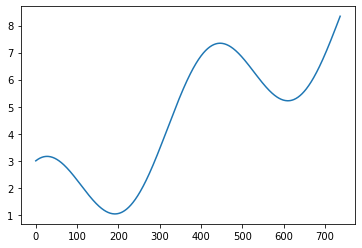

In [4]:
plt.plot(y)

In [73]:
mu, sigma = 0, np.sqrt(2)
s = np.random.normal(mu, sigma, y.shape)

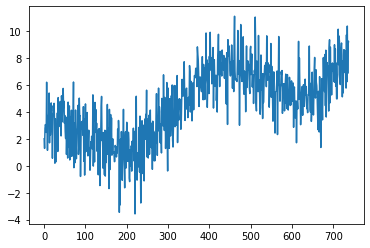

In [74]:
ans=y+s
plt.plot(ans)

In [7]:
theta=np.zeros((2,1))

In [8]:
x=x.reshape(738,1)
y=y.reshape(738,1)
ans=ans.reshape(738,1)
x.shape

(738, 1)

In [9]:
X0 = np.ones(shape=738)
X0=X0.reshape(738, 1)
K=np.hstack((X0, x))

In [10]:
pseudo = K.T.dot(K)
pseudo_inv = np.linalg.inv(pseudo)
theta_ans = pseudo_inv.dot(K.T).dot(ans)

In [11]:
theta_ans


array([[0.64135842],
       [0.82253794]])

In [12]:
fit1=K.dot(theta_ans)

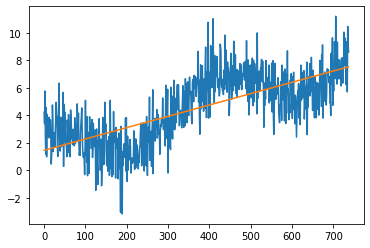

In [52]:
plt.plot(ans)
plt.plot(fit1)

In [15]:
res = np.ones(738)
for i in range(1,6):
            res = np.column_stack((res,x**i))

In [16]:
pseudo = res.T.dot(res)
pseudo_inv = np.linalg.inv(pseudo)
theta_ans1 = pseudo_inv.dot(res.T).dot(ans)

In [17]:
theta_ans1

array([[ -1.47029291],
       [ 12.3401101 ],
       [-10.57337311],
       [  3.47499583],
       [ -0.47068971],
       [  0.02242578]])

In [18]:
mse1=(fit1-ans)**2


In [19]:
mse1_

3.290303243182939

In [20]:
fit2=res.dot(theta_ans1)

In [58]:
mse2=(fit2-ans)**2
mse2_=np.mean(mse2)

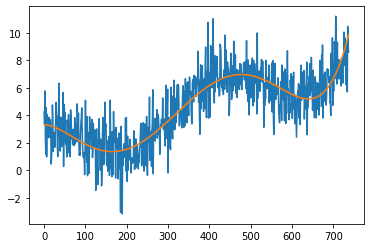

In [64]:
plt.plot(ans)
plt.plot(fit2)


In [23]:
mse2_

1.9334127598604107

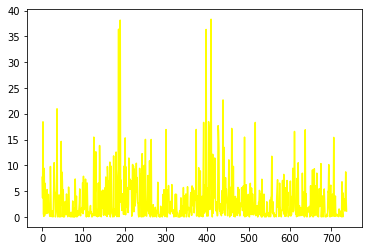

In [67]:
plt.plot(mse1 ,'yellow')
plt.plot(bias1_+var1_ ,'orange')
plt.show()

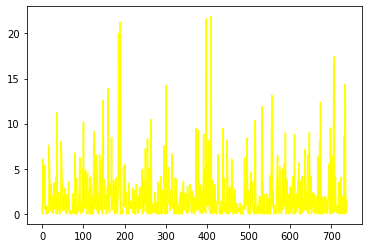

In [68]:
plt.plot(mse2 , 'yellow')
plt.plot(bias2+var2 , 'orange')

In [49]:
bias1=(ans-np.mean(fit1))
var1=np.mean((fit1-np.mean(fit1))**2)
bias1_=np.mean(bias1)
bias1_=bias1_**2
var1_=np.mean(var1)
varying=np.zeros(738)
varying=fit1+varying

var1_+bias1_

3.070736561441747

In [46]:
bias1=np.abs(fit1-ans)
bias1=np.mean(bias1**2)
bias1
var1=np.mean((fit1-varying)**2)
bias1

3.290303243182939

In [38]:
a=np.mean(bias1_+var1_)
a


3.070736561441747

In [57]:
bias2=(y-np.mean(fit2))
bias2=np.mean(bias2)
bias2=bias2**2
var2=np.mean((fit2-np.mean(fit2))**2)
var2=np.mean(var2)
print(bias2,var2)

0.0005529019833931853 4.427627034094842


In [123]:
#plt.plot(bias1)

In [45]:
A1=np.mean(np.mean(fit1**2)-np.mean(fit1)**2)
A1

3.0707365614417483

# ATTEMPT bias - Variance lab
 BIAS VARIANCE
 

In [4]:
mu=0
sigma=np.sqrt(2)


In [5]:
k=2000
x=np.arange(1,(2*np.pi*k)/(1.5*1000) ,0.01) 
f=x+2*np.sin(1.5*x)


2 738
(1001, 2)
(1000, 2)


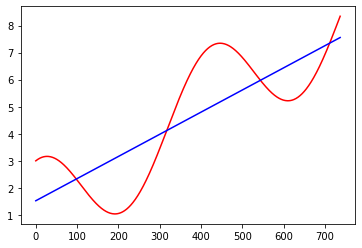

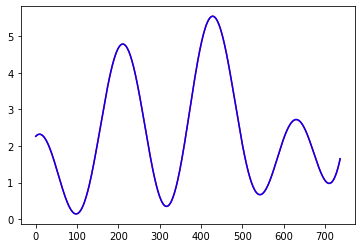

(738, 1)


-3.723308924047781e-18

In [16]:

m=len(x)
X0=np.ones(m)
x=x.reshape(m,1)
X0=X0.reshape(m,1)
K=np.hstack((X0,x))
n=K.shape[1]
Theta=np.empty([1,n])
print(n ,m)
for i in range(1000):
    noise=np.random.normal(mu, sigma, m)
    y=f+noise
    pseudo = K.T.dot(K)
    pseudo_inv = np.linalg.inv(pseudo)
    theta_ans = pseudo_inv.dot(K.T).dot(y)
    Theta=np.vstack((theta_ans,Theta))  # theta_ans every time takes up the first row  theta_ans comes out to be 1*2
    
print(Theta.shape)
Theta=Theta[1:,:]
print(Theta.shape) #1000*2

fit_1=K.dot(Theta.transpose())  # m*2 * 2*1000 = m*1000  har 1 fitted function vertical stored 
f1=np.mean(fit_1,axis=1)  # columnar mean mean of 1 row then 2 row then 3 row m values 
bias=abs(f-f1)

plt.plot(f,'r')
plt.plot(f1,'b')
plt.show()

f1=f1.reshape(m,1)  # m
o=np.ones(1000)
o=o.reshape(1,1000)
tf1=np.matmul(f1,o) #m*1000
var=np.mean((fit_1-tf1)**2,axis=1)

f=f.reshape(m,1)
f=f.dot(o)
mse=np.mean((f-fit_1)**2,axis=1)

plt.plot(bias**2+var,color='r')

plt.plot(mse,color='b')
#plt.legend()
plt.show()
print(f1.shape)
np.mean((bias**2+var-mse))

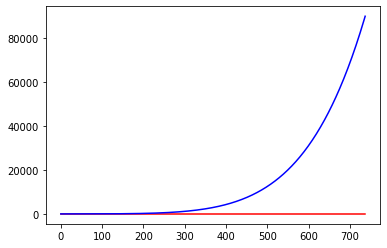

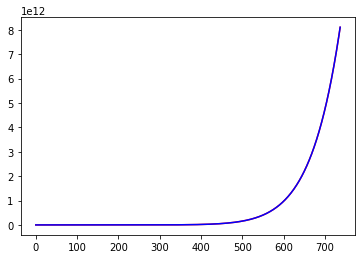

7.900910056654105e-06

In [204]:
x=np.arange(1,(2*np.pi*k)/(1.5*1000) ,0.01) 
f=x+2*np.sin(1.5*x)

m=len(x)
ones=np.ones(m)
x=x.reshape(m,1)
res = np.ones(m)
for i in range(1,6):
            res = np.column_stack((res,x**i))
X=np.hstack((res,x**6))
n=X.shape[1]

Theta=np.empty([1,n])
for i in range(1000):
    noise=np.random.normal(mu, sigma, m)
    y=f+noise
    pseudo = X.T.dot(X)
    pseudo_inv = np.linalg.inv(pseudo)
    theta_ans2 = pseudo_inv.dot(X.T).dot(y)
    Theta=np.vstack((theta_ans2,Theta))

Theta=Theta[1:,:]
Theta=Theta.transpose()
fit_2=X.dot(Theta)
f2=np.mean(fit_2,axis=1)
bias=abs(f-f2)

plt.plot(f,'r')
plt.plot(f2,'b')
plt.show()

f2=f2.reshape(m,1)
o=np.ones(1000)
o=o.reshape(1,1000)
tf2=f2.dot(o)
var=np.mean((fit_2-tf2)**2,axis=1)

f=f.reshape(m,1)
f=f.dot(o)
mse=np.mean((f-fit_2)**2,axis=1)

plt.plot(bias**2+var,color='r')
plt.plot(mse,color='b')
#plt.legend()
plt.show()
np.mean((bias**2+var-mse))